In [195]:
import pandas as pd

In [196]:
df = pd.read_csv('./dc_airbnb.csv');

In [197]:
df1 = df.copy()

In [198]:
df.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC
2,90%,100%,2,1,Private room,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD
3,100%,NaN,1,2,Private room,1.0,1.0,1.0,$95.00,NaN,NaN,1,1125,0,38.872134,-77.019639,Washington,20024,DC
4,92%,67%,1,4,Entire home/apt,1.0,1.0,1.0,$50.00,$15.00,$450.00,7,1125,0,38.996382,-77.041541,Silver Spring,20910,MD


In [199]:
df.dtypes

host_response_rate       object
host_acceptance_rate     object
host_listings_count       int64
accommodates              int64
room_type                object
bedrooms                float64
bathrooms               float64
beds                    float64
price                    object
cleaning_fee             object
security_deposit         object
minimum_nights            int64
maximum_nights            int64
number_of_reviews         int64
latitude                float64
longitude               float64
city                     object
zipcode                  object
state                    object
dtype: object

In [200]:
my_accomodation_size = 3
df['accommodates_distance'] = abs(df['accommodates'] - my_accomodation_size)

In [201]:
df.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,accommodates_distance
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC,1
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC,3
2,90%,100%,2,1,Private room,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD,2
3,100%,NaN,1,2,Private room,1.0,1.0,1.0,$95.00,NaN,NaN,1,1125,0,38.872134,-77.019639,Washington,20024,DC,1
4,92%,67%,1,4,Entire home/apt,1.0,1.0,1.0,$50.00,$15.00,$450.00,7,1125,0,38.996382,-77.041541,Silver Spring,20910,MD,1


In [202]:
df['accommodates_distance'].value_counts()

1     2294
2      503
0      461
3      279
5       73
4       35
7       22
6       17
9       12
13       8
8        7
12       6
11       4
10       2
Name: accommodates_distance, dtype: int64

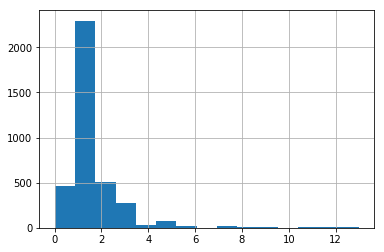

In [203]:
df['accommodates_distance'].hist(bins=15)

In [204]:
# Clean price column
df['price'] = df['price'].str.replace('$', '');
df['price'] = df['price'].str.replace(',', '');
df['price'] = df['price'].astype(float)

In [205]:
# Mean price for all entries with distance = 0
df.loc[df['accommodates_distance'] == 0, ['price']].mean()

price    146.169197
dtype: float64

In [206]:
def find_mean_price_of_rows(number_of_people_you_can_accomodate):
    df['accommodates_distance'] = abs(df['accommodates'] - number_of_people_you_can_accomodate)
    return df.loc[df['accommodates_distance'] == 0, ['price']].mean()

In [207]:
for i in range(1,6):
    print(find_mean_price_of_rows(i))

price    80.061404
dtype: float64
price    108.687656
dtype: float64
price    146.169197
dtype: float64
price    159.821739
dtype: float64
price    223.801242
dtype: float64


In [208]:
import numpy as np

In [209]:
new_df = df.sample(frac=1)

In [210]:
new_df.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,accommodates_distance
3102,NaN,NaN,1,4,Entire home/apt,2.0,2.0,3.0,200.0,NaN,NaN,1,1125,0,38.930768,-77.031171,Washington,20010,DC,1
277,87%,70%,190,3,Entire home/apt,1.0,1.0,1.0,569.0,$100.00,NaN,3,1125,0,38.894194,-77.020699,Washington,20001,DC,2
2194,NaN,NaN,1,7,Entire home/apt,2.0,1.5,3.0,190.0,$100.00,NaN,3,1125,2,38.898457,-76.991024,Washington,20002,DC,2
2070,100%,90%,2,2,Private room,1.0,1.5,1.0,72.0,NaN,$250.00,2,1125,1,38.897308,-76.985100,Washington,20002,DC,3
2418,100%,92%,1,1,Shared room,1.0,1.0,1.0,55.0,$25.00,NaN,1,60,7,38.923714,-77.036648,Washington,20009,DC,4


In [211]:
# n = number of people i accomdate
# k = top 5 of shuffled data
def price_predict(column, n=3, k=5):
    
    np.random.seed(3)
    
    df = pd.read_csv('./dc_airbnb.csv');
    
    df['price'] = df['price'].str.replace('$', '');
    df['price'] = df['price'].str.replace(',', '');
    df['price'] = df['price'].astype(float)
    
    # Shuffle the dataframe
    df = df.sample(frac=1)
    
    df['distance'] = abs(df[column] - n)
    df_for_n_accomdations = df.loc[df['distance'] == 0, ['price']]
    
    return df_for_n_accomdations.head(k)

In [212]:
price_predict('bedrooms', 3)

,price
38,480.0
2718,120.0
3374,500.0
824,650.0
3508,295.0


In [263]:
import numpy as np

# n = number of people i accomdate
# k = top 5 of shuffled data
def price_predict(column, n=3, k=5):
    
    np.random.seed(3)
    
    df = pd.read_csv('./dc_airbnb.csv');
    
    df['price'] = df['price'].str.replace('$', '');
    df['price'] = df['price'].str.replace(',', '');
    df['price'] = df['price'].astype(float)
    
    # Shuffle the dataframe
    df = df.sample(frac=1)

    df['distance'] = abs(df[column] - n)
    
    df_for_n_accomdations = df.loc[df['distance'] == 0, ['price']]
    
    mean = df_for_n_accomdations.head(k).mean()
    
    # Root of Mean Squared Error
    df_for_n_accomdations['error'] = df_for_n_accomdations['price'] - float(mean)
    df_for_n_accomdations['error'] = np.square(df_for_n_accomdations['error'])
    mse = df_for_n_accomdations['error'].mean()
    root_mean_squared_error = np.sqrt(mse)
    
    return float(mean), root_mean_squared_error

In [264]:
price_predict('accommodates', 3, 5)

(163.2, 100.4737912750821)